Plot the horizontal correlation length.

In [1]:
import os
import glob
import netCDF4
import logging
import calendar
import numpy as np
import emodnetchemistry
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from importlib import reload
reload(emodnetchemistry)

<module 'emodnetchemistry' from '/home/ctroupin/Projects/EMODnet/Chemistry/EMODnet-Chemistry/python/emodnetchemistry.py'>

In [2]:
logger = logging.getLogger("EMODnet-Chemistry-Data-positions")
logger.setLevel(logging.DEBUG)
logging.info("Starting")

## Paths

In [3]:
CLfile = "/data/EMODnet/correlation_len_0.25.nc"
figdir = "../figures/EMODnet2022/"
if not os.path.exists(figdir):
    os.makedirs(figdir)

## Make plot
Define projection

In [3]:
m = Basemap(projection='ortho', lon_0=5., lat_0=50, resolution='i')
domain = [-45., 70., 24., 83.]

#m = Basemap(projection='merc', llcrnrlon=domain[0], llcrnrlat=domain[2],
#            urcrnrlon=domain[1], urcrnrlat=domain[3],
#            lat_ts=0.5 * (domain[2] + domain[3]), resolution='i')

## Read data

In [9]:
lonr = np.arange(-45., 70.001, 0.25)
latr = np.arange(24., 83.001, 0.25)
len(lonr), len(latr)
llon, llat = np.meshgrid(lonr, latr)

In [8]:
with netCDF4.Dataset(CLfile, 'r') as nc:
    CL = nc.variables["correlation_length"][:]

(237, 461)

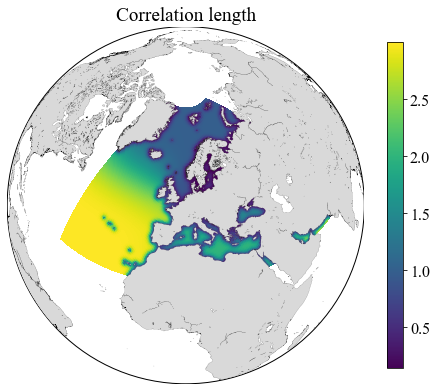

In [16]:
fig = plt.figure(figsize=(8, 12))
ax = plt.subplot(111)
plt.title("Correlation length")
pcm = m.pcolormesh(llon, llat, CL, latlon=True)
m.fillcontinents(color=".85", zorder=3)
m.drawcoastlines(linewidth=0.1, zorder=4)
cb = plt.colorbar(shrink=0.5)


plt.savefig(os.path.join(figdir, f"CLfield"), 
            dpi=300, bbox_inches="tight", facecolor="w",
                    transparent=False)
plt.show()
fig.clf()

In [15]:
CL.max()

2.999989707936414